In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/G4_Radiance.txt'

df = pd.read_csv(file_path, sep=',', encoding='utf-16')

df

,Wavelengths,G4_cam00000.asd,G4_dat100000.asd,G4_dat200000.asd,G4_dat300000.asd,G4_nau00000.asd,G4_nuoc100000.asd,G4_nuoc200000.asd,G4_nuoc300000.asd,G4_tim00000.asd,G4_vang00000.asd,G4_xanh00000.asd
0,350,2.104,0.536,0.673,0.711,3.406,2.775,1.886,1.389,2.123,1.711,2.927
1,351,2.654,0.674,0.788,1.441,2.738,2.335,1.373,0.526,2.130,1.405,2.709
2,352,3.574,0.126,1.058,1.928,4.609,3.654,0.739,0.688,2.909,2.423,2.198
3,353,2.723,1.100,1.629,1.663,5.371,4.130,1.713,0.994,3.042,3.118,2.702
4,354,2.747,0.846,1.563,1.546,5.877,4.389,1.783,1.479,3.679,3.772,1.884
...,...,...,...,...,...,...,...,...,...,...,...,...
2146,2496,205.158,43.000,30.502,22.474,567.993,8.111,9.136,8.146,69.597,219.255,254.931
2147,2497,203.495,43.294,30.127,23.147,559.663,6.940,6.857,7.830,65.813,214.087,250.207
2148,2498,202.074,43.476,30.876,22.670,552.928,10.434,3.964,7.862,65.142,209.771,245.693
2149,2499,199.701,41.193,31.861,24.078,549.046,13.237,4.853,7.238,66.874,206.320,242.867


In [ ]:
white_ref = pd.read_csv('/content/drive/MyDrive/G4_White_reference.txt', delim_whitespace=True, encoding='utf-16')
white_ref

,Wavelengths,DN
0,350,50.750
1,351,56.471
2,352,63.205
3,353,71.444
4,354,79.646
...,...,...
2146,2496,2233.293
2147,2497,2206.954
2148,2498,2180.115
2149,2499,2152.390


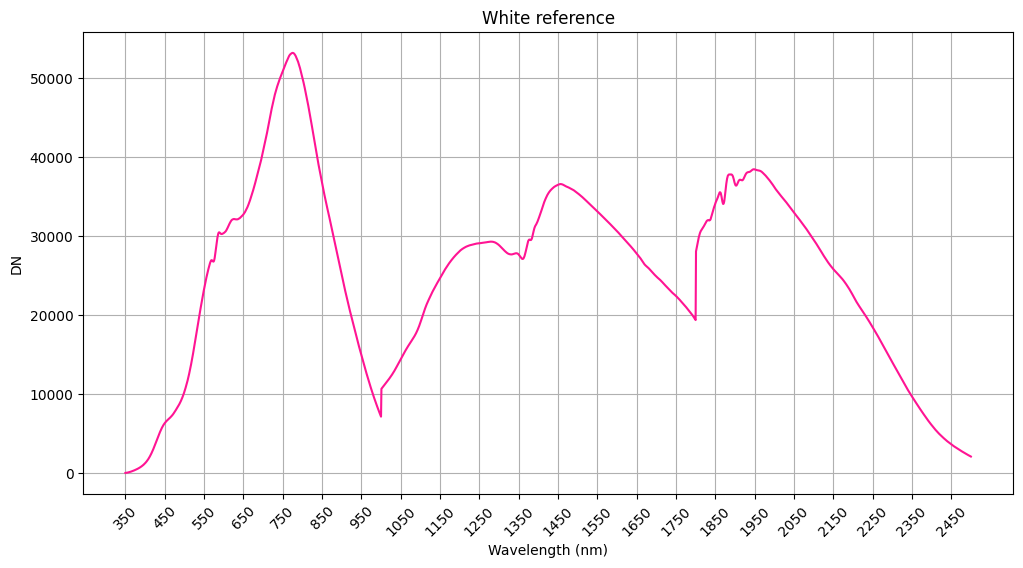

In [ ]:
x = white_ref['Wavelengths']
y = white_ref['DN']

fig, ax = plt.subplots(figsize = (12, 6))

ax.plot(x, y, 'deeppink')
ax.set_xlabel('Wavelength (nm)')
plt.xticks(range(int(x.min()), int(x.max()) + 5, 100), rotation=45)
ax.set_ylabel('DN')
ax.set_title('White reference')
plt.grid(True)
plt.show()

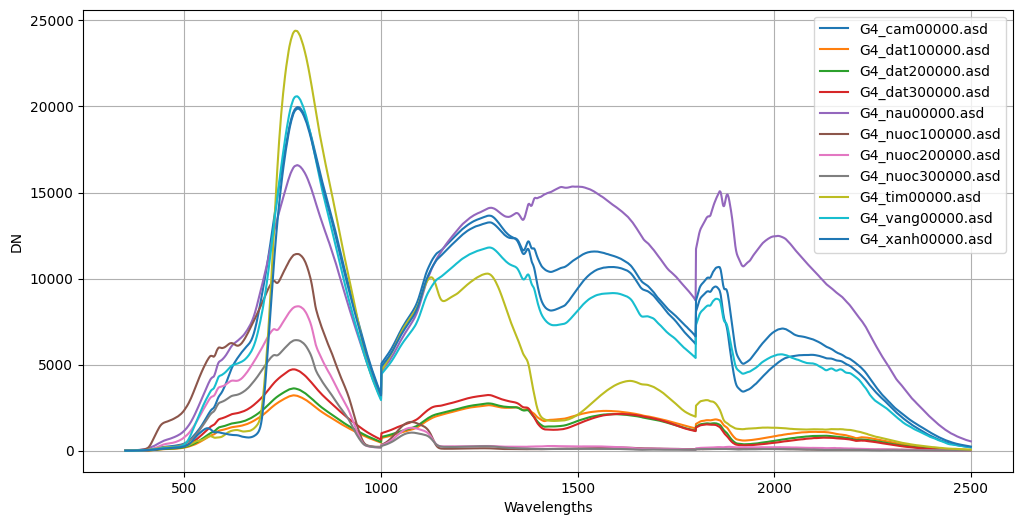

In [ ]:
wavelengths = df['Wavelengths']
variables = df.columns[1:]

plt.figure(figsize=(12, 6))

for variable in variables:
    plt.plot(wavelengths, df[variable], label=variable)

plt.xlabel('Wavelengths')
plt.ylabel('DN')
plt.legend()
plt.grid(True)
plt.show()

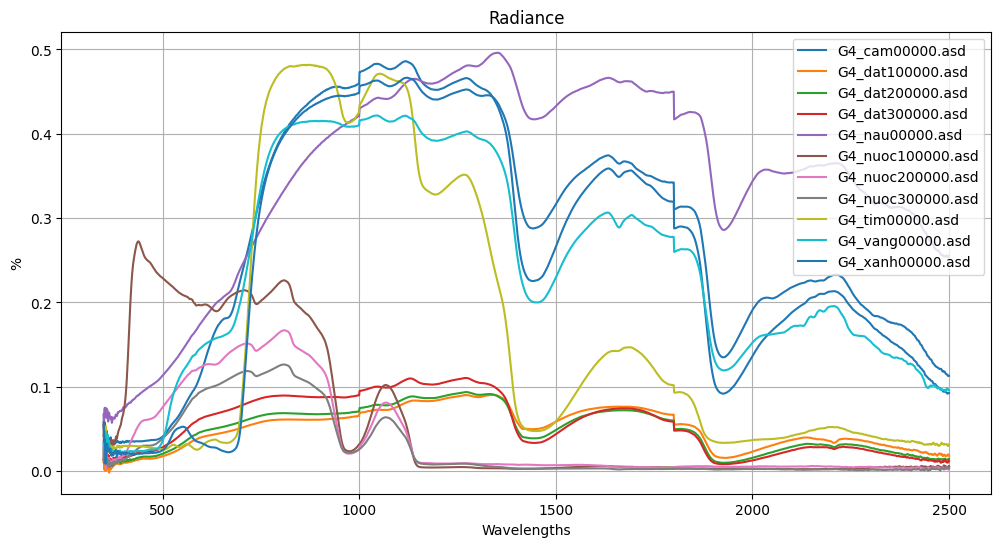

In [ ]:
plt.figure(figsize=(12, 6))
for variable in variables:
    plt.plot(wavelengths, df[variable]/white_ref['DN'], label=variable)

plt.title('Radiance')
plt.xlabel('Wavelengths')
plt.legend(loc='upper right')
plt.ylabel('%')
plt.grid(True)
plt.show()

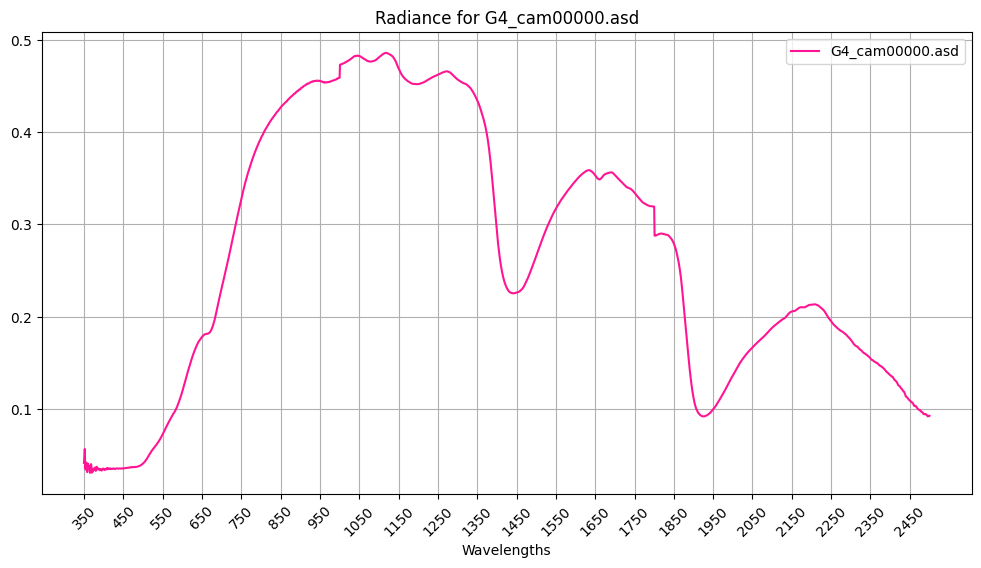

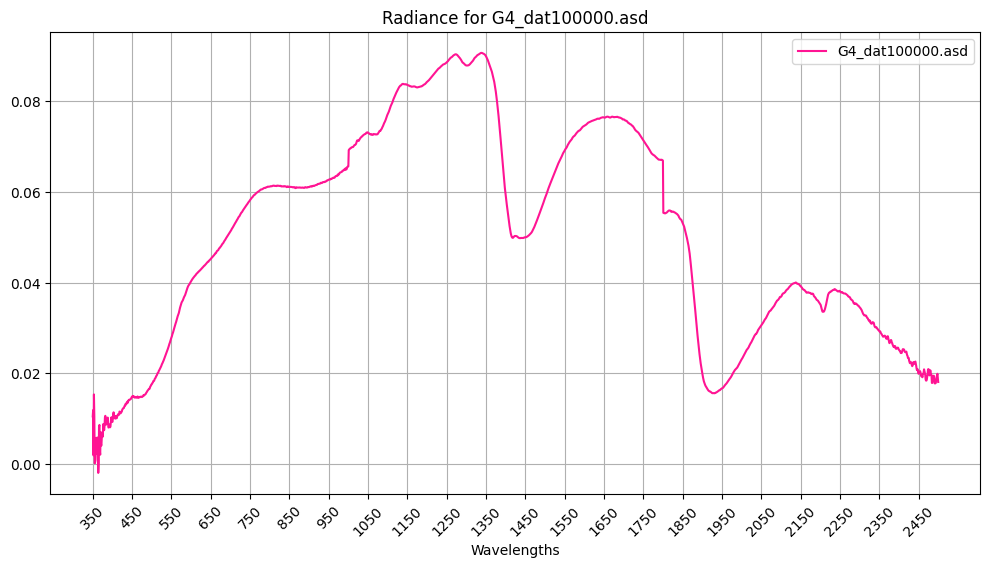

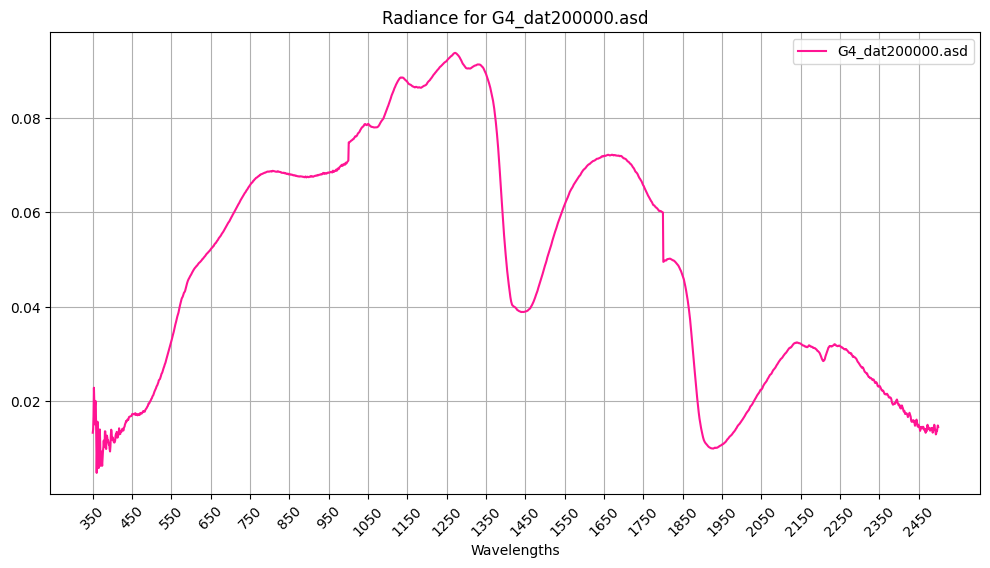

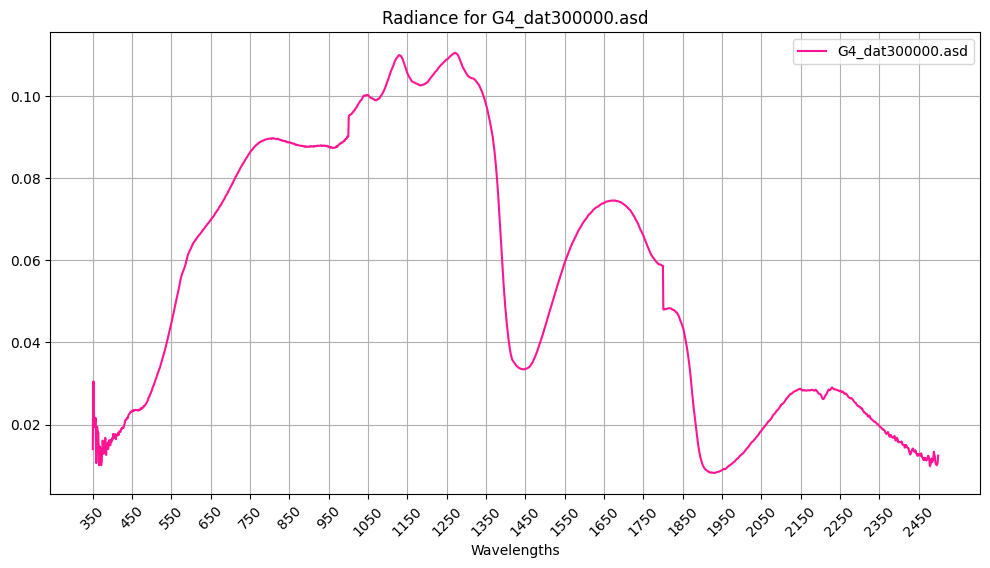

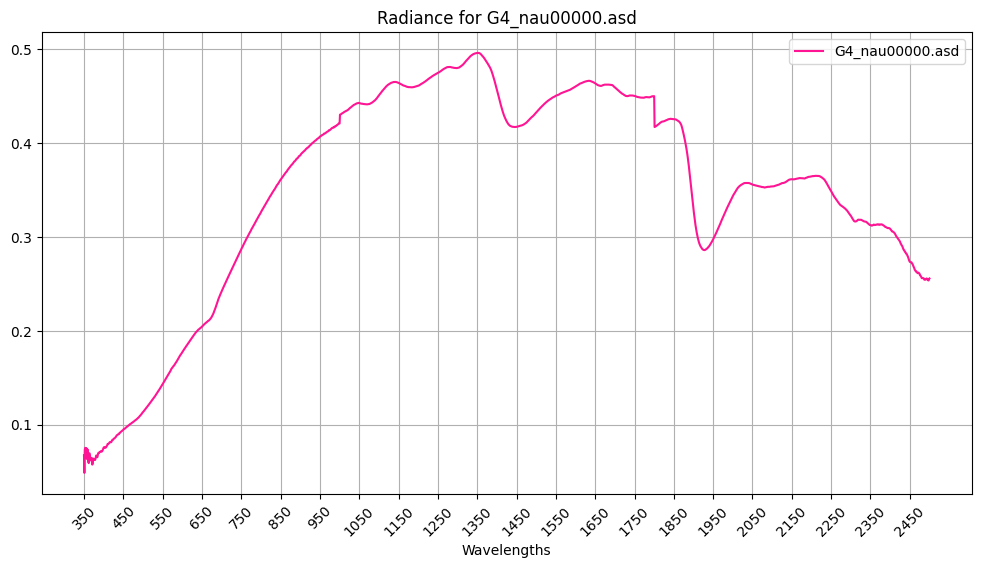

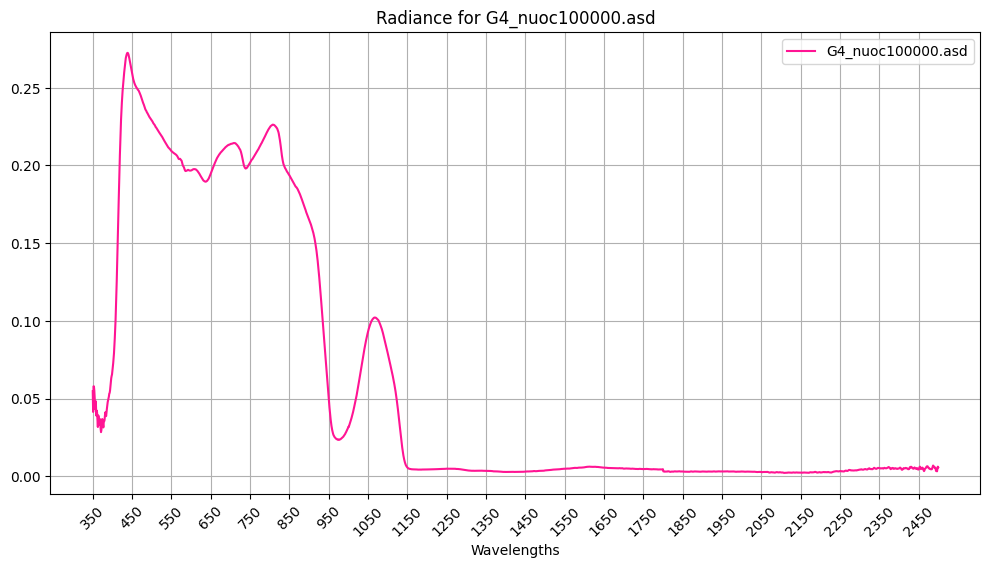

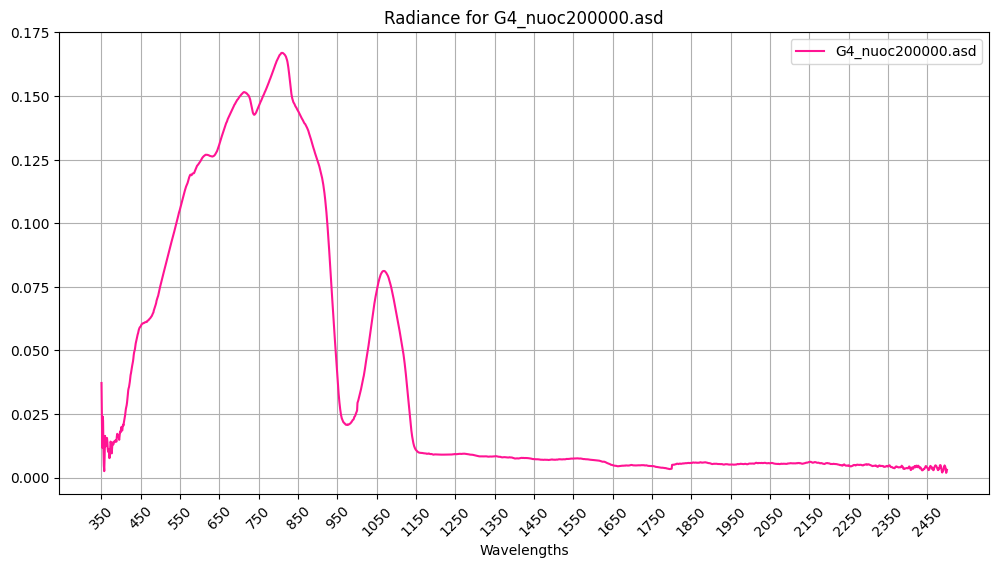

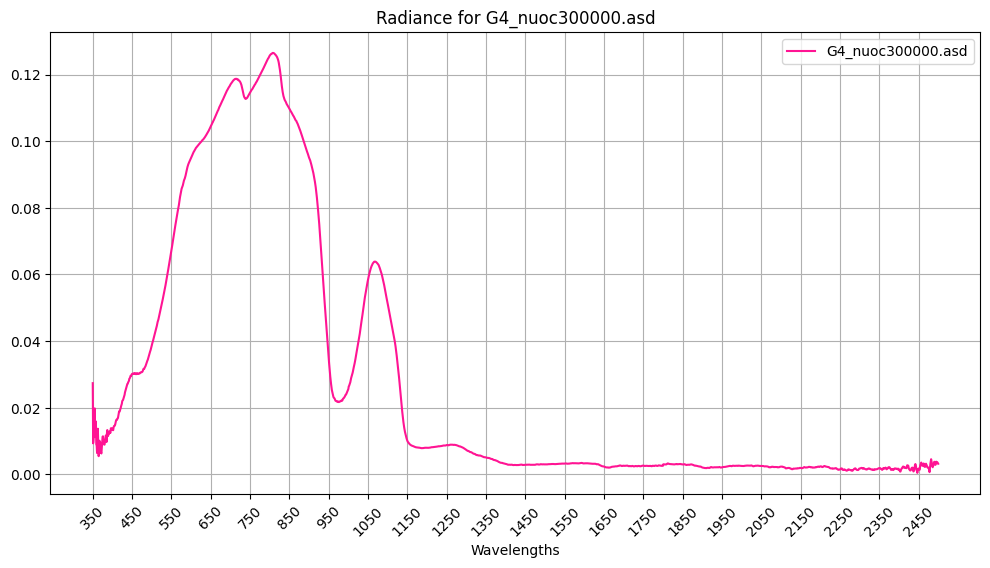

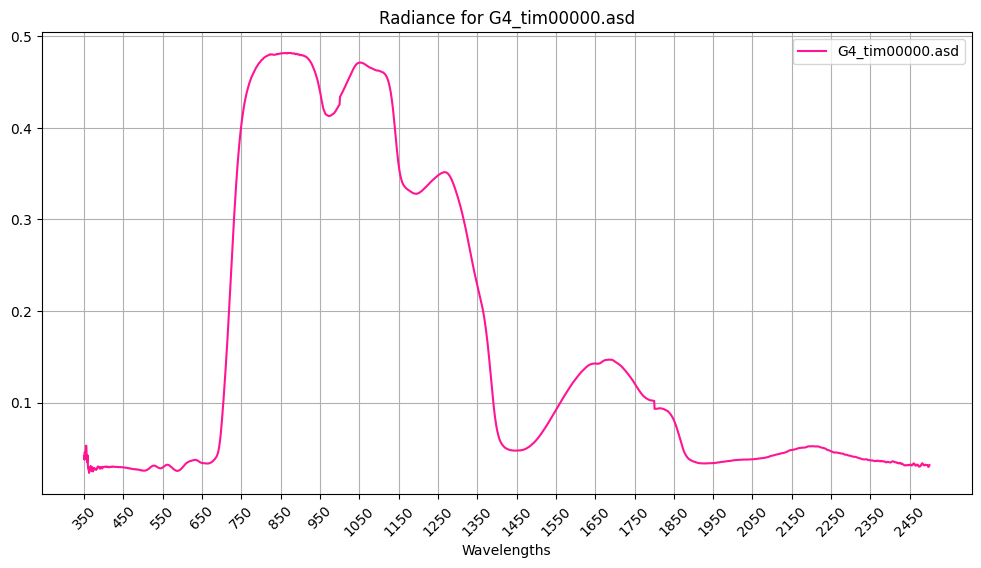

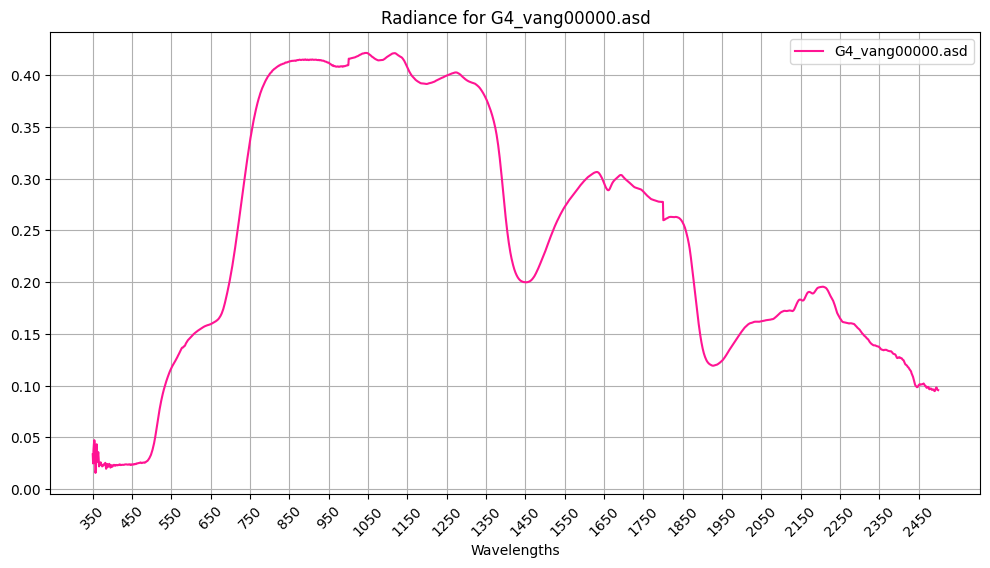

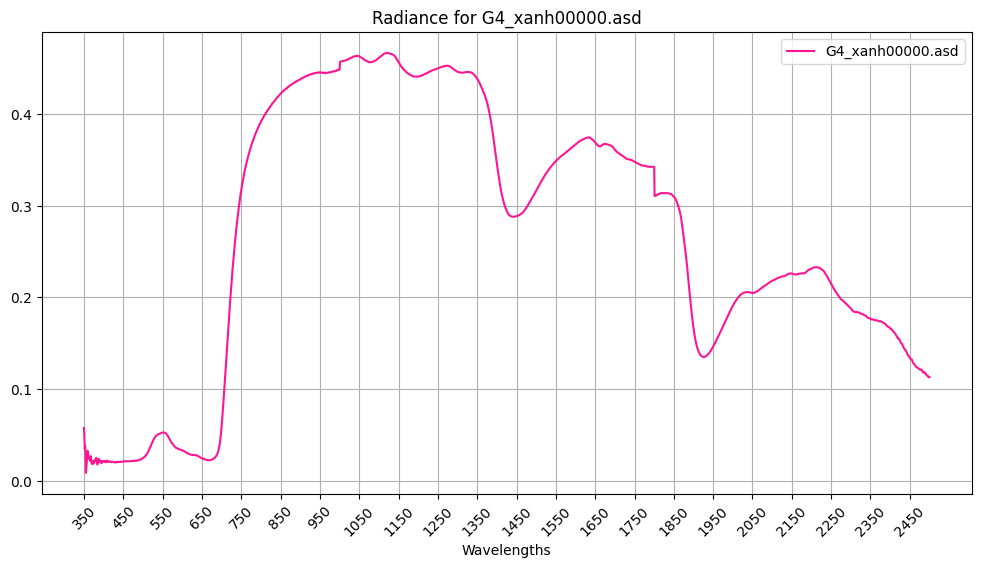

In [ ]:
for variable in variables:
    plt.figure(figsize=(12, 6))
    plt.plot(wavelengths, df[variable]/white_ref['DN'], label=variable, color = 'deeppink')
    plt.title(f'Radiance for {variable}')
    plt.xticks(range(int(wavelengths.min()), int(wavelengths.max()) + 1, 100), rotation=45)
    plt.xlabel('Wavelengths')
    plt.legend()
    plt.grid(True)
    plt.show()

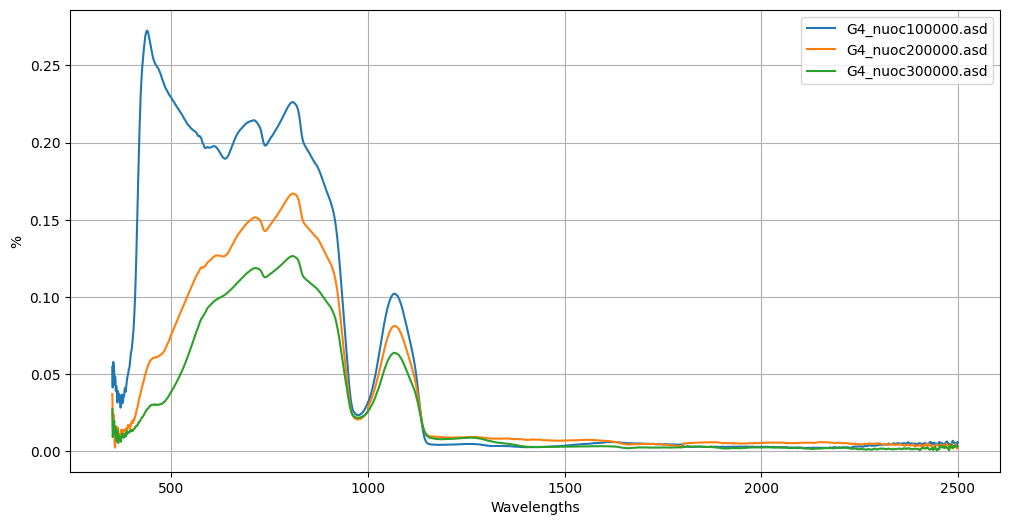

In [ ]:
nuoc1 = df['G4_nuoc100000.asd'] / white_ref['DN']
nuoc2 = df['G4_nuoc200000.asd'] / white_ref['DN']
nuoc3 = df['G4_nuoc300000.asd'] / white_ref['DN']

plt.figure(figsize=(12, 6))
plt.plot(wavelengths, nuoc1, label='G4_nuoc100000.asd')
plt.plot(wavelengths, nuoc2, label='G4_nuoc200000.asd')
plt.plot(wavelengths, nuoc3, label='G4_nuoc300000.asd')

plt.xlabel('Wavelengths')
plt.ylabel('%')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

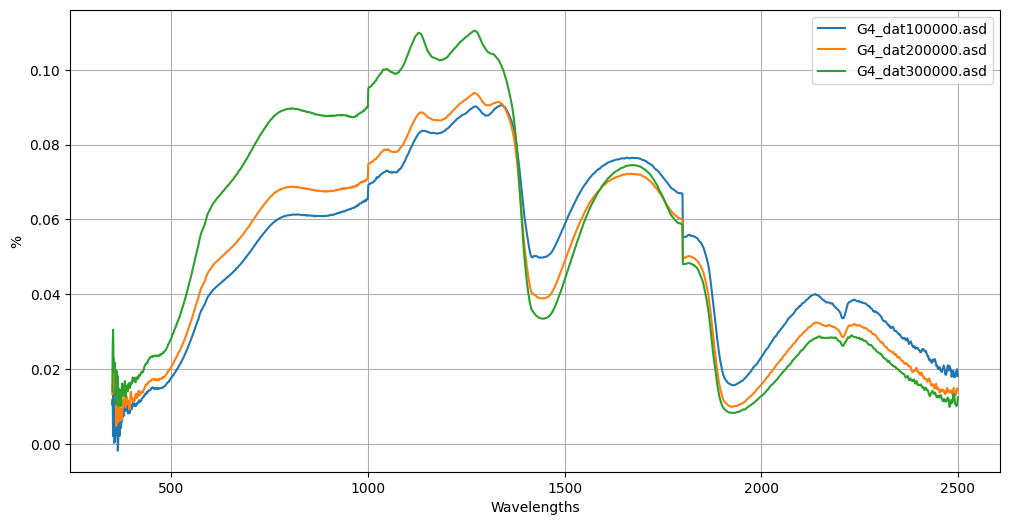

In [ ]:
dat1 = df['G4_dat100000.asd'] / white_ref['DN']
dat2 = df['G4_dat200000.asd'] / white_ref['DN']
dat3 = df['G4_dat300000.asd'] / white_ref['DN']

plt.figure(figsize=(12, 6))
plt.plot(wavelengths, dat1, label='G4_dat100000.asd')
plt.plot(wavelengths, dat2, label='G4_dat200000.asd')
plt.plot(wavelengths, dat3, label='G4_dat300000.asd')

plt.xlabel('Wavelengths')
plt.ylabel('%')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

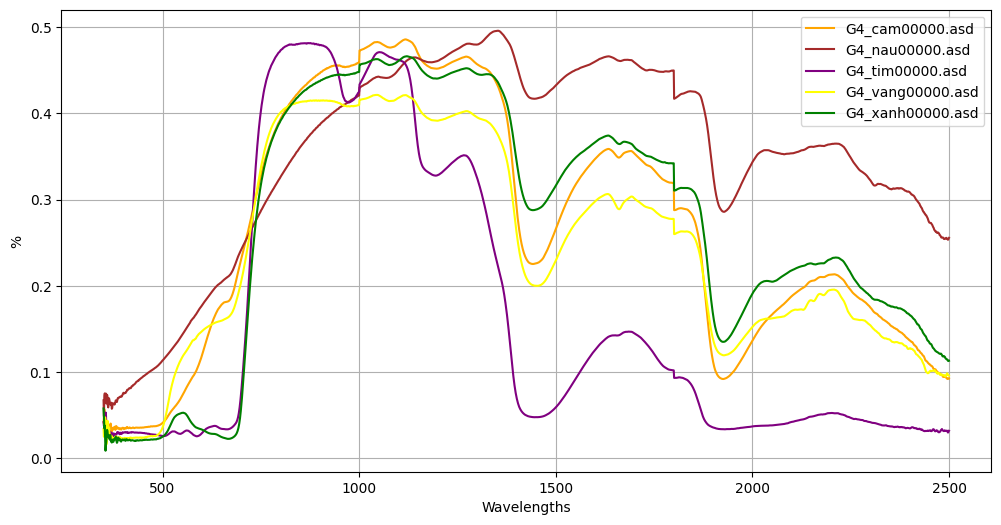

In [ ]:
cam = df['G4_cam00000.asd'] / white_ref['DN']
nau = df['G4_nau00000.asd'] / white_ref['DN']
tim = df['G4_tim00000.asd'] / white_ref['DN']
vang = df['G4_vang00000.asd'] / white_ref['DN']
xanh = df['G4_xanh00000.asd'] / white_ref['DN']

plt.figure(figsize=(12, 6))
plt.plot(wavelengths, cam, label='G4_cam00000.asd', color='orange')
plt.plot(wavelengths, nau, label='G4_nau00000.asd', color='brown')
plt.plot(wavelengths, tim, label='G4_tim00000.asd', color='purple')
plt.plot(wavelengths, vang, label='G4_vang00000.asd', color='yellow')
plt.plot(wavelengths, xanh, label='G4_xanh00000.asd', color='green')

plt.xlabel('Wavelengths')
plt.ylabel('%')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

NDVI

In [ ]:
wavelengths = df['Wavelengths']
materials = df.columns[1:]

red_wavelength = 680
nir_wavelength = 800

red_idx = (wavelengths - red_wavelength).abs().idxmin()
nir_idx = (wavelengths - nir_wavelength).abs().idxmin()

ndvi_values = {}
for material in materials:
    red_reflectance = df.iloc[red_idx][material] / white_ref.iloc[red_idx]['DN']
    nir_reflectance = df.iloc[nir_idx][material] / white_ref.iloc[nir_idx]['DN']

    ndvi = (nir_reflectance - red_reflectance) / (nir_reflectance + red_reflectance)
    ndvi_values[material] = ndvi

for material, ndvi in ndvi_values.items():
    print(f"{material}: {ndvi}")

G4_cam00000.asd: 0.34125692184327877
G4_dat100000.asd: 0.11454672875187978
G4_dat200000.asd: 0.10463414813264028
G4_dat300000.asd: 0.0940528305943159
G4_nau00000.asd: 0.1959428947419798
G4_nuoc100000.asd: 0.03417551785179682
G4_nuoc200000.asd: 0.06939330240609158
G4_nuoc300000.asd: 0.05639925693904541
G4_tim00000.asd: 0.8546862889396742
G4_vang00000.asd: 0.4000283099435726
G4_xanh00000.asd: 0.8831206860072321


EVI

In [ ]:
blue_wavelength = 470

red_idx = (wavelengths - red_wavelength).abs().idxmin()
nir_idx = (wavelengths - nir_wavelength).abs().idxmin()
blue_idx = (wavelengths - blue_wavelength).abs().idxmin()

C1 = 6
C2 = 7.5
L = 1

evi_values = {}
for material in materials:
    red_reflectance = df.iloc[red_idx][material] / white_ref.iloc[red_idx]['DN']
    nir_reflectance = df.iloc[nir_idx][material] / white_ref.iloc[nir_idx]['DN']
    blue_reflectance = df.iloc[blue_idx][material] / white_ref.iloc[blue_idx]['DN']

    evi = 2.5 * (nir_reflectance - red_reflectance) / (nir_reflectance + C1 * red_reflectance - C2 * blue_reflectance + L)
    evi_values[material] = evi

for material, evi in evi_values.items():
    print(f"{material}: {evi}")

G4_cam00000.asd: 0.2199809003844693
G4_dat100000.asd: 0.025295375354663995
G4_dat200000.asd: 0.025536434849232466
G4_dat300000.asd: 0.028362050033573394
G4_nau00000.asd: 0.14192412244358055
G4_nuoc100000.asd: 0.05837699652243083
G4_nuoc200000.asd: 0.034300382274722055
G4_nuoc300000.asd: 0.021345232377649594
G4_tim00000.asd: 0.732849853665491
G4_vang00000.asd: 0.25581546947821
G4_xanh00000.asd: 0.6677553225268579
